In [15]:
import pandas as pd
import string
import matplotlib.pyplot as plt

import nltk
from docx import Document
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

from wordcloud import WordCloud

In [16]:
# Ouvrir le fichier Word
doc = Document('description du brochet.docx')

# Extrait tt le texte :
texte = ""
for para in doc.paragraphs:
# Ajte chaq paragraphe avec 1 retour à la ligne :
    texte += para.text + "\n" 

print(texte)

Description du brochet
Le brochet est identifiable de par sa forme en balle de fusil. Les nageoires impaires sont en arrière de l’animal (permettant une propulsion de ‘sprinter’). La tête caractéristique ressemble à un bec de canard. La mandibule est plus longue que la mâchoire supérieure. La robe va du vert clair au noir suivant la couleur dominante des habitats colonisés. Les flancs sont plus clairs avec des bandes transversales plus foncées. Lors de la croissance, les rayures obliques des jeunes laissent place à des lignes horizontales. Sa coloration marbrée constitue un camouflage efficace dans le miroitement de la lumière. Grâce à ses nageoires situées très à l’arrière, il est capable d’accélérations fulgurantes. Mais il ne peut pas nager vite bien longtemps, c’est pourquoi il chasse à l’affût.
Sa taille est en moyenne de 50 à 60 cm (maximum 150 cm pour un poids de 35 kg et un âge de 30 ans).
 
Biotope du brochet
Le brochet occupe principalement la première moitié de la colonne d’

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sebla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


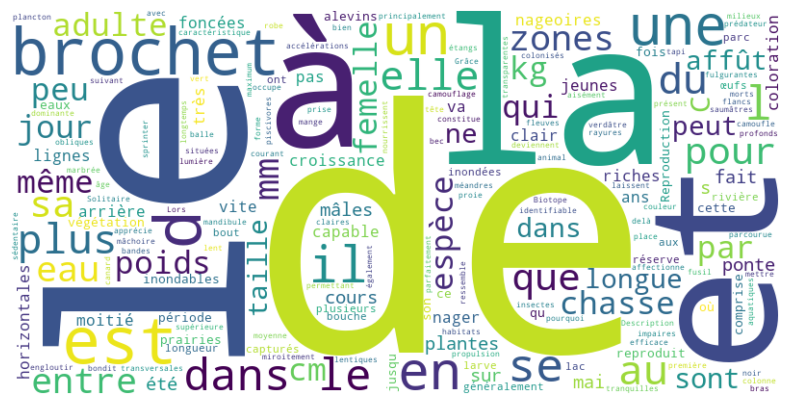

In [17]:
# Téléchrgemt des ressrces nécessaires :
nltk.download('punkt')

texte

# Génére le WordCloud à prtir du texte brut :
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_text(texte)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
# Désactive l'affichage des axes :
plt.axis("off")  
plt.show()

In [21]:
# Téléchrge les ressrces nécessaires :
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialise le lemmatiseur et les stopwords :
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

# ponctuat° à exclure :
punctuation = set(string.punctuation)

# ¨Prétraitemt du texte :
def preprocess_text(text):
    # Tokenisat° en phrases :
    phrases = sent_tokenize(texte)

# Tokenisat° :
    tokens = word_tokenize(text)
    
# Cvers° en minuscules et suppress° des mots vides :
    tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    
# Lemmatisat° :
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized_tokens

# Appliq le prétraitemt sur le texte extrait :
texte_preprocess = preprocess_text(texte)

# Créer 1 dict. de fréqces :
freq_dist = FreqDist(texte_preprocess)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sebla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sebla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


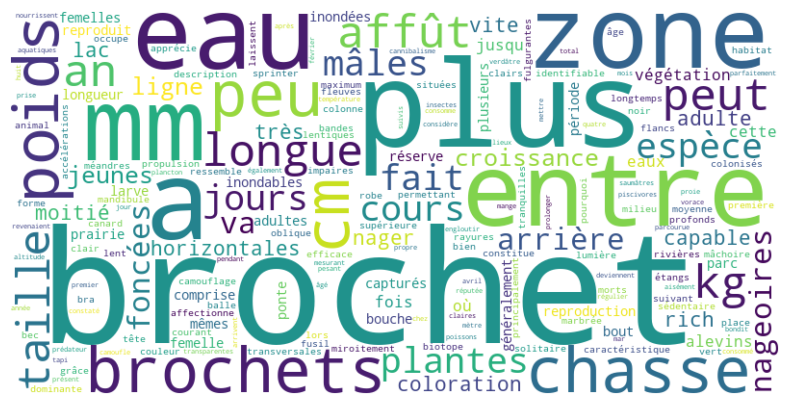

In [23]:
# Génére le WordCloud à prtir du texte brut :
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

# Désactive l'affichage des axes :
plt.axis("off")  
plt.show()

In [29]:
# Initialise le stemmer :
stemmer = PorterStemmer()

texte_preprocess

# Applique le stemming sur les tokens lemmatisés :
stemmed_tokens = [stemmer.stem(token) for token in texte_preprocess if token.isalpha() and token.lower() not in stop_words]

# Calcul de la fréqce des mots après stemming :
freq_dist_stemmed = FreqDist(stemmed_tokens)

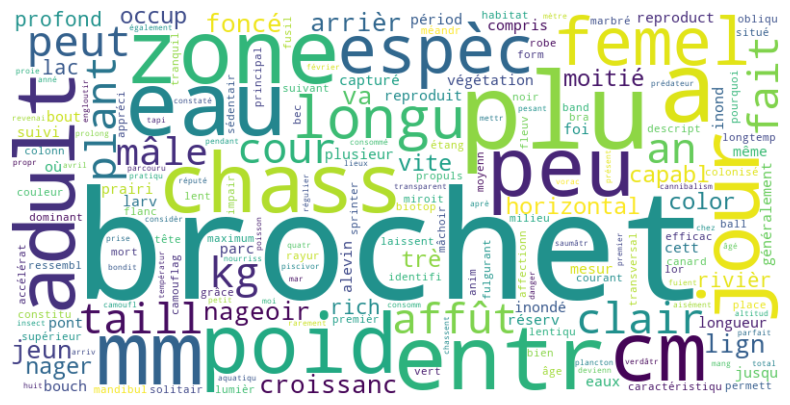

In [30]:
# Génére le WordCloud à prtir du texte brut :
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist_stemmed)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

# Désactive l'affichage des axes :
plt.axis("off")  
plt.show()

In [31]:
# Initialise le lemmatiseur et les stopwords :
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

texte_preprocess

# Appliq la lemmatisat° sur chaq token :
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in texte_preprocess if token.isalpha() and token.lower() not in stop_words]

# Calcul de la fréqce des mots après lemmatisat° :
freq_dist_lemmatized = FreqDist(lemmatized_tokens)

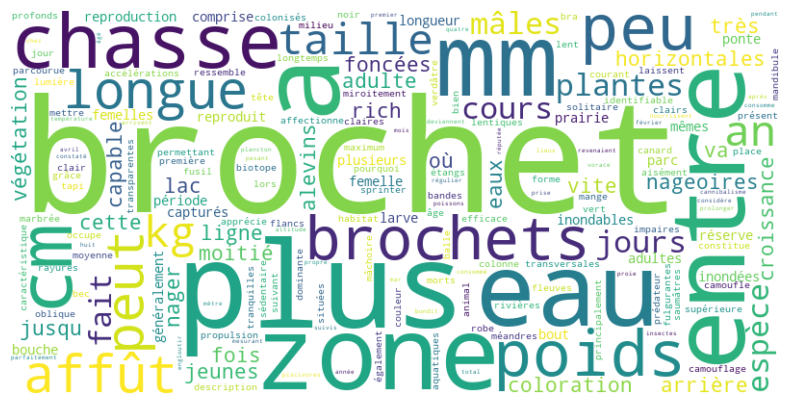

In [32]:
# Génére le WordCloud à prtir du texte brut :
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist_lemmatized)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

# Désactive l'affichage des axes :
plt.axis("off")  
plt.show()